\
<font size = 6 color='black'><b><u><i><center>AquaPredict: Ensuring Safe Water</b></i></u></center></font>
\
<font size = 5 color='brown'><center>By: Aditya Ghige</center></font>

Aim:To develop a reliable machine learning model that accurately predicts water quality, enabling effective management and ensuring safe water for all.

Objectives:. Collect and preprocess water quality data2. Identify key physicochemical parameter
3. Develop and train machine learning mode
4. Evaluate model performa.
5. Deploy the best model for real-time predicn.
6. Analyze and interpret prediction rets.
7. Document findings and recommendons.
8. Ensure model adaptability and integration.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Water Quality Prediction_final.csv")

# Features Description

pH: Measurement of the acidity or alkalinity of the water.

Iron: Concentration of iron in the water.

Nitrate: Concentration of nitrate in the water.

Chloride: Concentration of chloride in the water.

Lead: Concentration of lead in the water.

Zinc: Concentration of zinc in the water.

Turbidity: Measure of how clear the water is, based on the presence of particles.

Fluoride: Concentration of fluoride in the water.

Copper: Concentration of copper in the water.

Odor: Presence or intensity of odor in the water.

Sulfate: Concentration of sulfate in the water.

Chlorine: Concentration of chlorine in the water.

Manganese: Concentration of manganese in the water.

Total Dissolved Solids: Total concentration of dissolved substances in the water.

Air Temperature: Temperature of the air, which may affect water quality.

Target: The outcome variable indicating water quality status or classification.

In [3]:
# Getting top 5 row of the dataset

df.head()

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,Copper,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
0,8.332988,0.000083,8.605777,122.799772,3.710000e-52,3.434827,Colorless,0.022683,0.607283,0.144599,...,3.708178,2.270000e-15,332.118789,NaN,NaN,43.493324,January,29.0,4.0,0
1,6.917863,0.000081,3.734167,227.029851,7.850000e-94,1.245317,Faint Yellow,0.019007,0.622874,0.437835,...,3.292038,8.020000e-07,284.641984,Lake,15.348981,71.220586,November,26.0,16.0,0
2,5.443762,0.020106,3.816994,230.995630,5.290000e-76,0.528280,Light Yellow,0.319956,0.423423,0.431588,...,3.560224,7.007989e-02,570.054094,River,11.643467,44.891330,January,31.0,8.0,0
3,7.955339,0.143988,8.224944,178.129940,4.000000e-176,4.027879,Near Colorless,0.166319,0.208454,0.239451,...,3.516907,2.468295e-02,100.043838,Ground,10.092392,60.843233,April,1.0,21.0,0
4,8.091909,0.002167,9.925788,186.540872,4.170000e-132,3.807511,Light Yellow,0.004867,0.222912,0.616574,...,3.177849,3.296139e-03,168.075545,Spring,15.249416,69.336671,June,29.0,7.0,0


In [4]:
#the features you want to drop
features_to_drop = [ 'Color', 'Source','Month','Day','Time of Day','Conductivity','Water Temperature']
df.drop(columns=features_to_drop, inplace=True)


In [5]:
print(df.shape)

(99999, 16)


In [6]:
print(df.columns)

Index(['pH', 'Iron', 'Nitrate', 'Chloride', 'Lead', 'Zinc', 'Turbidity',
       'Fluoride', 'Copper', 'Odor', 'Sulfate', 'Chlorine', 'Manganese',
       'Total Dissolved Solids', 'Air Temperature', 'Target'],
      dtype='object')


In [7]:
df.describe()


,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,Odor,Sulfate,Chlorine,Manganese,Total Dissolved Solids,Air Temperature,Target
count,98063.000000,9.929800e+04,98236.000000,97060.000000,9.953200e+04,97339.000000,9.918700e+04,96795.000000,9.666400e+04,97113.000000,96642.000000,99087.000000,9.822500e+04,99974.000000,99503.000000,99999.000000
mean,7.429003,1.627582e-01,6.412500,190.382987,2.046246e-03,1.605949,6.169723e-01,1.027275,5.769789e-01,1.881272,150.727189,3.305423,1.485212e-01,274.416017,60.045597,0.500005
std,0.989020,5.523924e-01,3.584751,74.770988,3.760978e-02,1.647048,1.047661e+00,0.900057,6.767327e-01,1.113032,75.328635,0.780780,5.538847e-01,159.701740,18.095669,0.500003
min,2.561677,7.450000e-40,0.529255,38.101784,0.000000e+00,0.000005,8.020000e-13,0.000071,4.440000e-08,0.011072,16.164578,1.035579,2.120000e-37,0.012985,-15.106136,0.000000
25%,6.823330,1.250000e-05,4.006456,139.633817,1.310000e-122,0.420637,4.332462e-02,0.388534,1.361408e-01,0.930052,98.702245,2.762619,3.860000e-06,137.026845,47.822268,0.000000
50%,7.431432,2.877816e-03,5.704853,179.325781,3.010000e-62,1.098275,2.360467e-01,0.804078,3.728778e-01,1.849148,136.641929,3.236779,1.096495e-03,273.203453,60.069639,1.000000
75%,8.053424,6.990781e-02,7.938119,225.039394,9.270000e-27,2.278333,7.249541e-01,1.411918,7.675694e-01,2.771157,186.632283,3.759302,2.901893e-02,408.553627,72.310385,1.000000
max,12.441113,1.293574e+01,61.252584,1430.548852,2.511762e+00,21.500163,1.418437e+01,10.299514,1.139056e+01,4.141968,1279.553774,10.351240,2.026258e+01,579.799458,132.740078,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pH                      98063 non-null  float64
 1   Iron                    99298 non-null  float64
 2   Nitrate                 98236 non-null  float64
 3   Chloride                97060 non-null  float64
 4   Lead                    99532 non-null  float64
 5   Zinc                    97339 non-null  float64
 6   Turbidity               99187 non-null  float64
 7   Fluoride                96795 non-null  float64
 8   Copper                  96664 non-null  float64
 9   Odor                    97113 non-null  float64
 10  Sulfate                 96642 non-null  float64
 11  Chlorine                99087 non-null  float64
 12  Manganese               98225 non-null  float64
 13  Total Dissolved Solids  99974 non-null  float64
 14  Air Temperature         99503 non-null

In [9]:
print(df.nunique())

pH                        98062
Iron                      75322
Nitrate                   98235
Chloride                  97059
Lead                      68320
Zinc                      97338
Turbidity                 98577
Fluoride                  96793
Copper                    96652
Odor                      97112
Sulfate                   96642
Chlorine                  99085
Manganese                 70641
Total Dissolved Solids    99974
Air Temperature           99502
Target                        2
dtype: int64


In [10]:
print(df.isnull().sum())

pH                        1936
Iron                       701
Nitrate                   1763
Chloride                  2939
Lead                       467
Zinc                      2660
Turbidity                  812
Fluoride                  3204
Copper                    3335
Odor                      2886
Sulfate                   3357
Chlorine                   912
Manganese                 1774
Total Dissolved Solids      25
Air Temperature            496
Target                       0
dtype: int64


<Axes: >

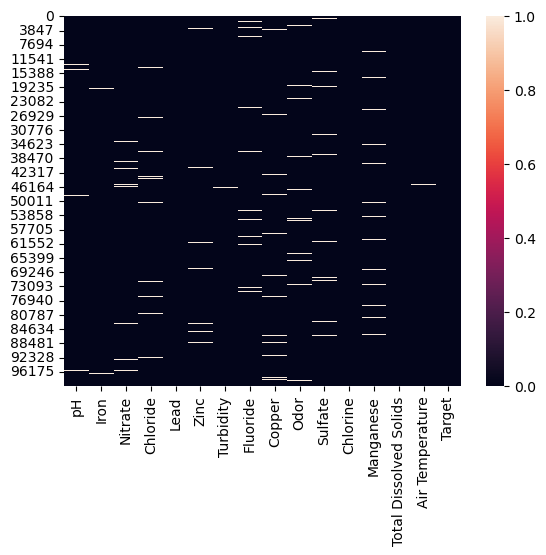

In [11]:
sns.heatmap(df.isnull())

In [13]:
# Unstacking the correlation matrix to see the values more clearly.
corr = df.corr()
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)[12:24:2]

Lead       Lead       1.000000
Nitrate    Nitrate    1.000000
Turbidity  Target     0.238099
Target     Copper     0.223505
Chloride   Target     0.221061
Manganese  Target     0.186874
dtype: float64

In [14]:
# Assuming 'df' is your DataFrame
df.fillna(df.mean(), inplace=True)


In [15]:
print(df.isnull().sum())

pH                        0
Iron                      0
Nitrate                   0
Chloride                  0
Lead                      0
Zinc                      0
Turbidity                 0
Fluoride                  0
Copper                    0
Odor                      0
Sulfate                   0
Chlorine                  0
Manganese                 0
Total Dissolved Solids    0
Air Temperature           0
Target                    0
dtype: int64


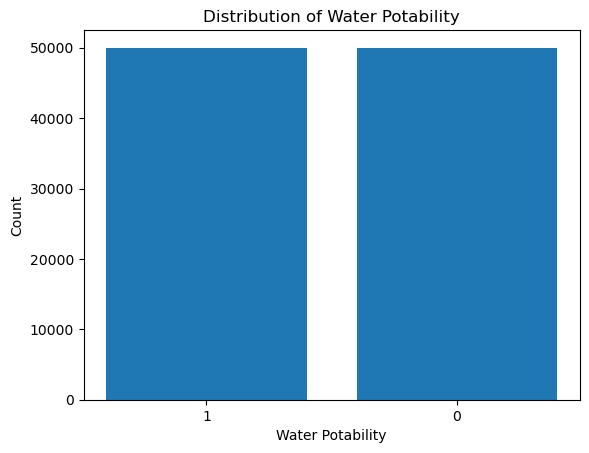

In [16]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'Target' is the name of the target feature
target_counts = df['Target'].value_counts()

# Plotting
plt.bar(target_counts.index.astype(str), target_counts.values)
plt.xlabel('Water Potability')
plt.ylabel('Count')
plt.title('Distribution of Water Potability')
plt.show()

In [17]:
X = df.drop('Target', axis=1)
y = df['Target']

In [18]:
X.shape, y.shape

((99999, 15), (99999,))

In [19]:
# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

In [20]:
X = scaler.fit_transform(X)
X

array([[ 0.9230042 , -0.29553041,  0.61730427, ..., -0.27055664,
         0.36136284, -0.91699068],
       [-0.52189372, -0.29553586, -0.75382447, ..., -0.27055518,
         0.06403998,  0.61909085],
       [-2.02700774, -0.25915589, -0.73051252, ..., -0.14289421,
         1.85142954, -0.83954163],
       ...,
       [ 1.55064807, -0.22416207,  0.24020499, ..., -0.27039051,
         0.59708669,  0.16049188],
       [-0.3649166 , -0.14125459, -0.7448766 , ..., -0.27051529,
        -0.54079622, -1.34128526],
       [-1.31781392, -0.29567395,  0.08189988, ..., -0.22768003,
         1.26065047, -1.03353344]])

In [21]:
# import train-test split 
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Logistic regression

             A statistical method for binary classification that predicts the probability of an outcome using a logistic function (sigmoid function). It models the relationship between input features and the probability of a binary outcome.

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# Creating model object
model_lg = LogisticRegression(max_iter=120,random_state=0, n_jobs=20)
# Training Model
model_lg.fit(X_train, y_train)
LogisticRegression(max_iter=120, n_jobs=20, random_state=0)
# Making Prediction
pred_lg = model_lg.predict(X_test)
# Calculating Accuracy Score
lg = accuracy_score(y_test, pred_lg)
print(lg)

0.7717878787878788


In [24]:
print(classification_report(y_test,pred_lg))

              precision    recall  f1-score   support

           0       0.75      0.83      0.78     16587
           1       0.80      0.71      0.76     16413

    accuracy                           0.77     33000
   macro avg       0.78      0.77      0.77     33000
weighted avg       0.78      0.77      0.77     33000



<Axes: >

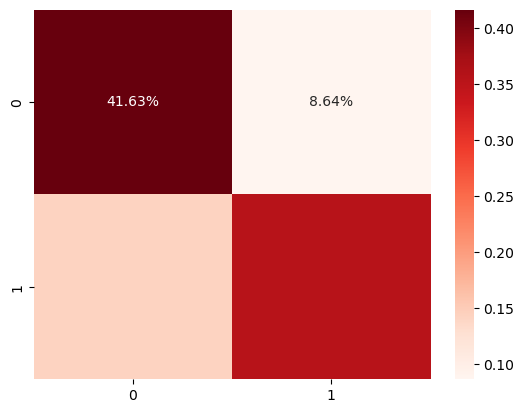

In [25]:
# confusion Maxtrix
cm1 = confusion_matrix(y_test, pred_lg)
sns.heatmap(cm1/np.sum(cm1), annot = True, fmt=  '0.2%', cmap = 'Reds')

# Decision Tree

                             A model used for classification and regression that splits data into branches based on feature values to make predictions. It creates a tree-like structure of decisions, with each node representing a feature test, each branch representing an outcome, and each leaf representing a prediction

In [26]:
from sklearn.tree import DecisionTreeClassifier
# Creating model object
model_dt = DecisionTreeClassifier( max_depth=4, random_state=42)
# Training Model
model_dt.fit(X_train,y_train)
# Making Prediction
pred_dt = model_dt.predict(X_test)
# Calculating Accuracy Score
dt = accuracy_score(y_test, pred_dt)
print(dt)

0.7976666666666666


In [27]:
print(classification_report(y_test,pred_dt))

              precision    recall  f1-score   support

           0       0.76      0.88      0.81     16587
           1       0.86      0.71      0.78     16413

    accuracy                           0.80     33000
   macro avg       0.81      0.80      0.80     33000
weighted avg       0.81      0.80      0.80     33000



<Axes: >

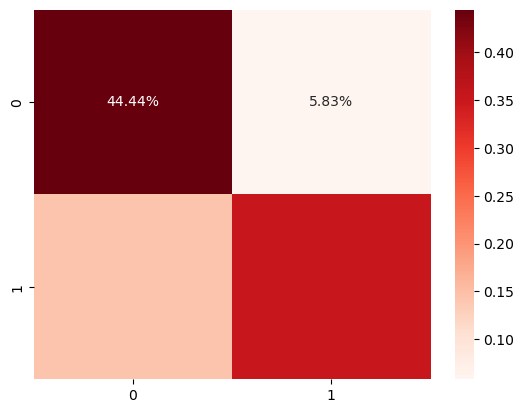

In [28]:
# confusion Maxtrix
cm2 = confusion_matrix(y_test, pred_dt)
sns.heatmap(cm2/np.sum(cm2), annot = True, fmt=  '0.2%', cmap = 'Reds')

# Random Forest

           An ensemble learning method that combines multiple decision trees to improve accuracy and robustness. It creates a "forest" of decision trees by training each tree on a random subset of the data and features, and then averages their predictions (for regression) or uses majority voting (for classification) to make a final decision.

In [29]:
from sklearn.ensemble import RandomForestClassifier
# Creating model object
model_rf = RandomForestClassifier(n_estimators=300,min_samples_leaf=0.16, random_state=42)
# Training Model
model_rf.fit(X_train, y_train)
# Making Prediction
pred_rf = model_rf.predict(X_test)
# Calculating Accuracy Score
rf = accuracy_score(y_test, pred_rf)
print(rf)

0.7136060606060606


In [30]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72     16587
           1       0.72      0.70      0.71     16413

    accuracy                           0.71     33000
   macro avg       0.71      0.71      0.71     33000
weighted avg       0.71      0.71      0.71     33000



<Axes: >

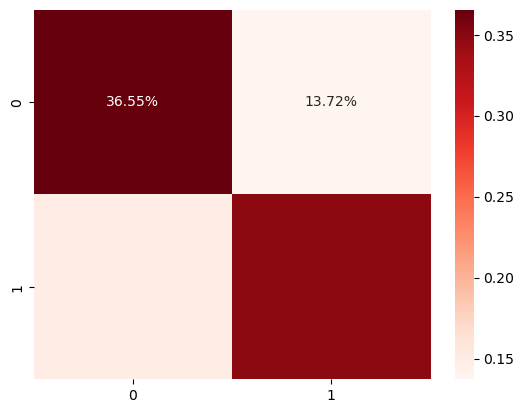

In [31]:
# confusion Maxtrix
cm3 = confusion_matrix(y_test, pred_rf)
sns.heatmap(cm3/np.sum(cm3), annot = True, fmt=  '0.2%', cmap = 'Reds')

# KNN

      A simple, instance-based learning algorithm used for classification and regression. It classifies a data point based on the majority class of its K closest neighbors or predicts a value by averaging the values of its K nearest neighbors. The choice of K and the distance metric (e.g., Euclidean distance) are key factors in its performance.

In [32]:
from sklearn.neighbors import KNeighborsClassifier
# Creating model object
model_kn = KNeighborsClassifier(n_neighbors=9, leaf_size=20)
# Training Model
model_kn.fit(X_train, y_train)
# Making Prediction
pred_kn = model_kn.predict(X_test)
# Calculating Accuracy Score
kn = accuracy_score(y_test, pred_kn)
print(kn)

0.813939393939394


In [33]:
print(classification_report(y_test,pred_kn))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83     16587
           1       0.86      0.75      0.80     16413

    accuracy                           0.81     33000
   macro avg       0.82      0.81      0.81     33000
weighted avg       0.82      0.81      0.81     33000



<Axes: >

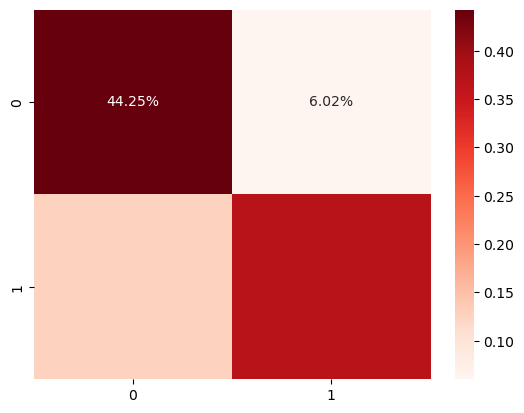

In [34]:
# confusion Maxtrix
cm5 = confusion_matrix(y_test, pred_kn)
sns.heatmap(cm5/np.sum(cm5), annot = True, fmt=  '0.2%', cmap = 'Reds')

# SVM

           A supervised learning algorithm used for classification and regression. It finds the hyperplane that best separates data into different classes by maximizing the margin between classes. For non-linearly separable data, SVM uses kernel functions to transform data into a higher-dimensional space where a hyperplane can be used to separate classes.

In [35]:
from sklearn.svm import SVC, LinearSVC
model_svm = SVC(kernel='rbf', random_state = 42)
model_svm.fit(X_train, y_train)
# Making Prediction
pred_svm = model_svm.predict(X_test)
# Calculating Accuracy Score
sv = accuracy_score(y_test, pred_svm)
print(sv)

0.8636363636363636


In [36]:
print(classification_report(y_test,pred_svm))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86     16587
           1       0.85      0.87      0.86     16413

    accuracy                           0.86     33000
   macro avg       0.86      0.86      0.86     33000
weighted avg       0.86      0.86      0.86     33000



<Axes: >

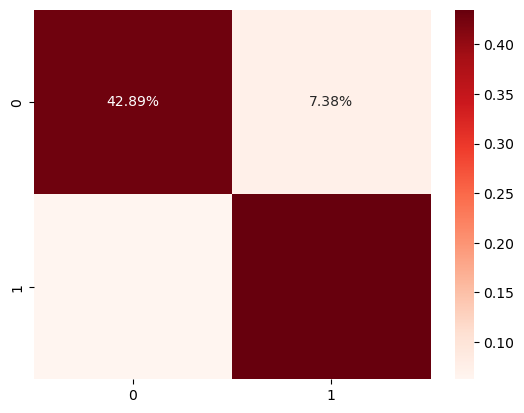

In [37]:
# confusion Maxtrix
cm6 = confusion_matrix(y_test, pred_svm)
sns.heatmap(cm6/np.sum(cm6), annot = True, fmt=  '0.2%', cmap = 'Reds')

# Compiled Results

,Model,Accuracy_score
4,SVM,0.863636
3,KNeighbours,0.813939
1,Decision Tree,0.797667
0,Logistic Regression,0.771788
2,Random Forest,0.713606


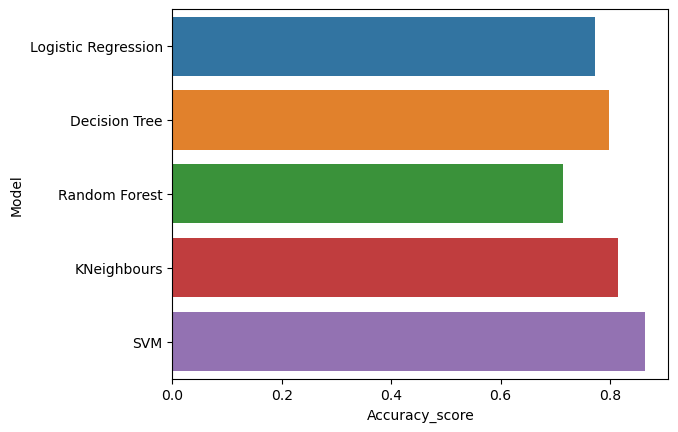

In [38]:
models = pd.DataFrame({
    'Model':['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNeighbours', 'SVM'],
    'Accuracy_score' :[lg, dt, rf, kn, sv]
})
models
sns.barplot(x='Accuracy_score', y='Model', data=models)

models.sort_values(by='Accuracy_score', ascending=False)

# Conclusion

                         The Aquapredict project successfully developed a reliable machine learning model capable of accurately forecasting water quality based on key physicochemical parameters. This model facilitates effective water resource management and ensures safe water supply. Through thorough data collection, model development, and evaluation, the project demonstrated the potential of machine learning in enhancing water quality monitoring and decision-making. The deployment of the model provides a practical tool for real-time prediction, contributing to the sustainable management of water resources and the well-being of communities.

# 